# churn prediction

**Features :**
- customer id
- vintage
- age of customer
- dependence
- city
- transaction information
- current balance
- end balnce


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action="ignore",category=FutureWarning)
warnings.simplefilter(action="ignore",category=UserWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [2]:
dataset = pd.read_csv(r'C:\Users\admin\Desktop\tefoLOGIC\Data\churn_prediction.csv')
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
dataset.shape

(28382, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
dataset.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
dataset['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [7]:
dict_gender = {"Male":1,"Female":0}
dataset.replace({'gender':dict_gender},inplace=True)
dataset['gender'] = dataset['gender'].fillna(-1)

In [8]:
dataset['dependents'].value_counts()

dependents
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: count, dtype: int64

In [9]:
dataset['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [10]:
dataset['dependents'] = dataset['dependents'].fillna(0)
dataset['occupation'] = dataset['occupation'].fillna('self_employed')

In [11]:
dataset['city'].value_counts()

city
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: count, Length: 1604, dtype: int64

In [12]:
dataset['city'] = dataset['city'].fillna(1020)

In [13]:
dataset['days_since_last_transaction'] = dataset['days_since_last_transaction'].fillna(999)

In [14]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['occupation'],prefix = str('occupation'),prefix_sep='_',dtype=int)],axis = 1)

In [15]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [16]:
dataset.columns.tolist()

['customer_id',
 'vintage',
 'age',
 'gender',
 'dependents',
 'occupation',
 'city',
 'customer_nw_category',
 'branch_code',
 'days_since_last_transaction',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'churn',
 'occupation_company',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student']

In [17]:
num_cols= ['customer_nw_category','current_balance','previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',]
for i in num_cols:
    dataset[i]=np.log(dataset[i]+17000)
std = StandardScaler()
scaled = std.fit_transform(dataset[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [18]:
dataset_og = dataset.copy()
dataset = dataset.drop(columns = num_cols,axis = 1)
dataset = dataset.merge(scaled,left_index=True,right_index=True,how = "left")

In [19]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.697612,-0.630646,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.317595,0.949414,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.108263,-0.388637,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.582976,-0.712855,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.663399,-0.554058,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [20]:
y_all = dataset.churn
dataset = dataset.drop(['churn','customer_id','occupation'],axis = 1)

In [21]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']
df_baseline = dataset[baseline_cols]

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [23]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

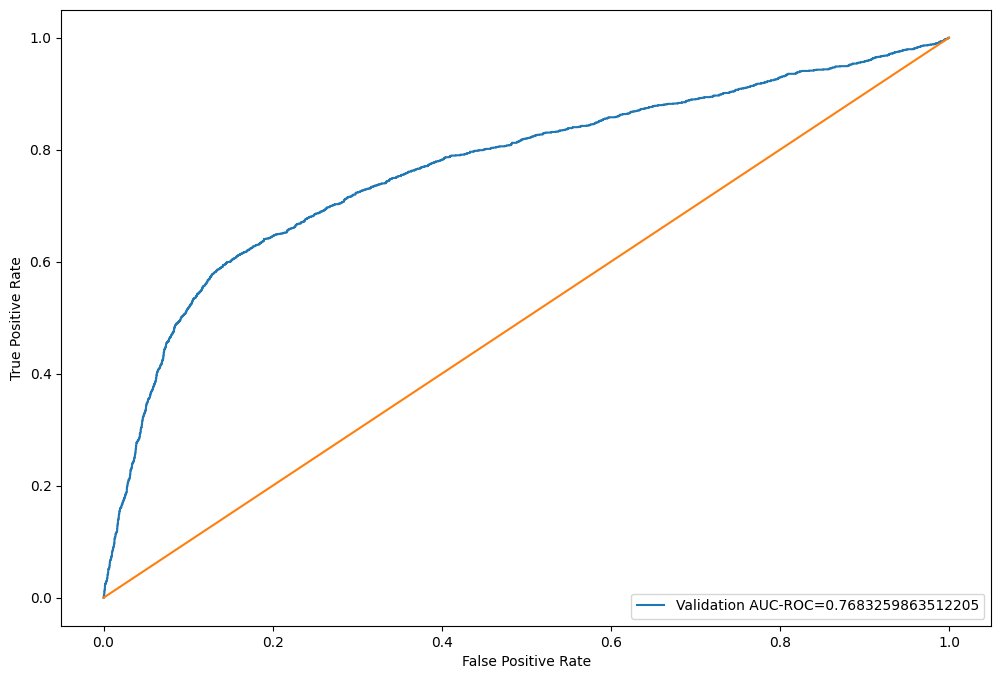

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [25]:
pred_val = model.predict(xtest)

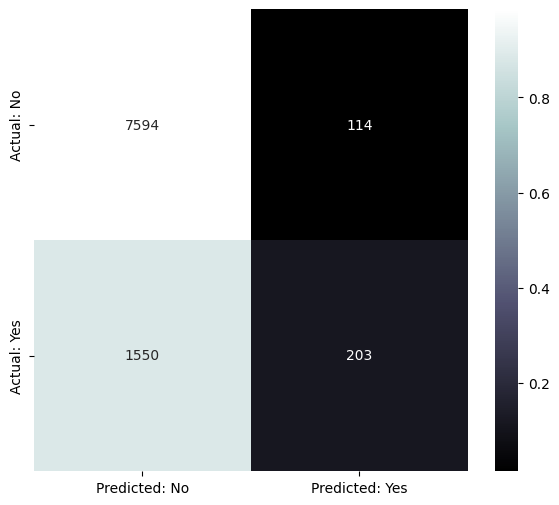

In [26]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sb.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])


In [27]:
recall_score(ytest,pred_val)

0.11580148317170565

In [28]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = dataset.columns):
    i = 1
    cv_scores = []
    df1 = dataset.copy()
    df1 = dataset[cols]

    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [29]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [30]:
# # Define model for fitting on the training set for each fold
#         model = ml_model
#         model.fit(xtr, ytr)
#         pred_probs = model.predict_proba(xvl)
#         pp = []
# def cv_score(ml_model, rstate = 12, thres = 0.5, cols = dataset.columns):
#     i = 1
#     cv_scores = []
#     df1 = df.copy()
#     df1 = df[cols]

#     # 5 Fold cross validation stratified on the basis of target
#     kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
#     for df_index,test_index in kf.split(df1,y_all):
#         print('\n{} of kfold {}'.format(i,kf.n_splits))
#         xtr,xvl = df1.loc[df_index],df1.loc[test_index]
#         ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
# # Calculate scores for each fold and print
#         pred_val = pp
#         roc_score = roc_auc_score(yvl,pred_probs[:,1])
#         recall = recall_score(yvl,pred_val)
#         precision = precision_score(yvl,pred_val)
#         sufix = ""
#         msg = ""
#         msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
#         print("{}".format(msg))

#          # Save scores
#         cv_scores.append(roc_score)
#         i+=1
#     return cv_scores